In [1]:
import os
os.chdir("/home/zdz")

In [2]:
tracking_dataset_dir = 'argoverse-api/argoverse-tracking/sample/'
from argoverse.map_representation.map_api import ArgoverseMap
am = ArgoverseMap()

In [3]:
from argoverse.data_loading.argoverse_tracking_loader import ArgoverseTrackingLoader

log_index = 0
frame_index = 50
idx = 50

argoverse_loader = ArgoverseTrackingLoader(tracking_dataset_dir)
log_id = argoverse_loader.log_list[log_index]
argoverse_data = argoverse_loader[log_index]
city_name = argoverse_data.city_name

lidar_pts = argoverse_data.get_lidar(idx)

In [4]:
x,y,_ = argoverse_data.get_pose(frame_index).translation
print("pose:{},{}".format(x,y))

pose:2624.801656746951,1232.3312847194882


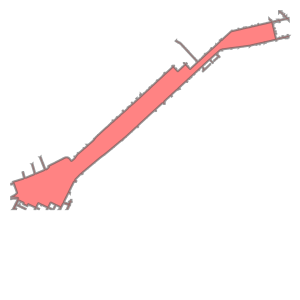

In [5]:
from shapely.geometry.polygon import Polygon
display(Polygon(am.find_local_driveable_areas([x-50, x+50, y-50, y+50], 'PIT')[0]))

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from visualize_30hz_benchmark_data_on_map import DatasetOnMapVisualizer

dataset_dir = tracking_dataset_dir
prefix = "argoverse_test_0223"

use_exist_files = True
city_to_egovehicle_se3 = argoverse_data.get_pose(idx)

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

domv = DatasetOnMapVisualizer(dataset_dir, prefix, use_existing_files=use_exist_files, log_id=argoverse_data.current_log)

In [7]:
centerline_dict = am.city_lane_centerlines_dict
centerline_pit = centerline_dict["PIT"]
pit_keys_list = list(centerline_pit.keys())
centerline_pit[pit_keys_list[0]].centerline

array([[3168.06631026, 1674.66399198],
       [3166.98215685, 1673.70919401],
       [3165.89800345, 1672.75439604],
       [3164.81385004, 1671.79959807],
       [3163.72969104, 1670.84480643],
       [3162.64551836, 1669.89003027],
       [3161.56134568, 1668.93525411],
       [3160.47717299, 1667.98047796],
       [3159.39300031, 1667.0257018 ],
       [3158.30882763, 1666.07092564]])

In [25]:
xmin = x - 40
xmax = x + 40
ymin = y - 40
ymax = y + 40

local_lane_polygons = am.find_local_lane_polygons([xmin,xmax,ymin,ymax], "PIT")
local_das = am.find_local_driveable_areas([xmin,xmax,ymin,ymax], "PIT")
local_centerlines = am.find_local_lane_centerlines(x,y, "PIT", query_search_range_manhattan=40)
#print(local_lane_polygons.shape, local_das.shape, local_centerlines.shape)
local_centerlines

array([[[2659.62619312, 1260.55926605,   14.46106434],
        [2658.56649797, 1259.52600816,   14.47309399],
        [2657.50680282, 1258.49275028,   14.48143578],
        [2656.44710767, 1257.4594924 ,   14.51213551],
        [2655.38741252, 1256.42623451,   14.52143478],
        [2654.32771736, 1255.39297663,   14.52746964],
        [2653.26802221, 1254.35971874,   14.52253532],
        [2652.20832706, 1253.32646086,   14.52480602],
        [2651.14863191, 1252.29320297,   14.51994705],
        [2650.08893676, 1251.25994509,   14.52801037]],

       [[2593.64301263, 1185.50792259,   15.60767651],
        [2591.97675154, 1187.20287109,   15.59617901],
        [2590.34718422, 1188.93140904,   15.6218977 ],
        [2588.72987908, 1190.6736069 ,   15.69866085],
        [2587.11257394, 1192.41580477,   15.74960518],
        [2585.4952688 , 1194.15800263,   15.75403023],
        [2583.87796366, 1195.90020049,   15.71768761],
        [2582.26065852, 1197.64239836,   15.6127758 ],
        

In [26]:
local_centerlines.shape

(28, 10, 3)

In [27]:
for i in range(0,150,5):
    x,y,_ = argoverse_data.get_pose(i).translation
    local_centerlines = am.find_local_lane_centerlines(x,y, "PIT")
    print(local_centerlines.shape)

(105, 10, 3)
(107, 10, 3)
(113, 10, 3)
(112, 10, 3)
(108, 10, 3)
(106, 10, 3)
(118, 10, 3)
(107, 10, 3)
(102, 10, 3)
(109, 10, 3)
(106, 10, 3)
(104, 10, 3)
(104, 10, 3)
(105, 10, 3)
(110, 10, 3)
(110, 10, 3)
(114, 10, 3)
(110, 10, 3)
(111, 10, 3)
(112, 10, 3)
(110, 10, 3)
(99, 10, 3)
(100, 10, 3)
(98, 10, 3)
(99, 10, 3)
(99, 10, 3)
(99, 10, 3)
(99, 10, 3)
(99, 10, 3)
(99, 10, 3)


In [26]:
def write_nodes(nodes, osm):
    node_map = {}
    lat_base = 30.100
    lon_base = 120.100
    node_id = 0
    for node in nodes:
        #node_id += 1
        #id = 0
        if node in node_map.keys():
            continue
        node_id += 1
        node_map[node] = node_id
        
        #id = node_id
        lat = lat_base + float(node[1]/150000.0)
        lon = lon_base + float(node[0]/150000.0)
        timestamp = '2018-07-19T19:10:59Z'
        changeset = '60881636'
        
        # write
        osm.write('\t<node id="%s" lat="%.7f" lon="%.7f" visible="true" version="1" timestamp="%s" changeset="%s"/>\n' % (node_id, lat, lon, timestamp, changeset))
    node_num = node_id
    return node_map, node_num
    
def write_one_way(osm, line, way_id, node_map, width=2):
    timestamp = '2018-07-19T19:10:59Z'
    changeset = '60881636'
    osm.write('\t<way id="%d" visible="true" version="1" timestamp="%s" changeset="%s">\n' % (way_id, timestamp, changeset))
    for node in line:
        node_id = node_map[node]
        osm.write('\t\t<nd ref="%d"/>\n' % node_id)
    osm.write('\t\t<tag k="highway" v="primary"/>\n')
    osm.write('\t\t<tag k="width" v="%d"/>\n' % width)
    osm.write('\t</way>\n')

def write_ways(osm, lines, node_map, node_num):
    for line in lines:
        node_num = node_num + 1
        write_one_way(osm, line, node_num, node_map)

In [28]:
x,y,_ = argoverse_data.get_pose(50).translation
local_centerlines = am.find_local_lane_centerlines(x,y, "PIT", query_search_range_manhattan=40)
local_centerlines

array([[[2659.62619312, 1260.55926605,   14.46106434],
        [2658.56649797, 1259.52600816,   14.47309399],
        [2657.50680282, 1258.49275028,   14.48143578],
        [2656.44710767, 1257.4594924 ,   14.51213551],
        [2655.38741252, 1256.42623451,   14.52143478],
        [2654.32771736, 1255.39297663,   14.52746964],
        [2653.26802221, 1254.35971874,   14.52253532],
        [2652.20832706, 1253.32646086,   14.52480602],
        [2651.14863191, 1252.29320297,   14.51994705],
        [2650.08893676, 1251.25994509,   14.52801037]],

       [[2593.64301263, 1185.50792259,   15.60767651],
        [2591.97675154, 1187.20287109,   15.59617901],
        [2590.34718422, 1188.93140904,   15.6218977 ],
        [2588.72987908, 1190.6736069 ,   15.69866085],
        [2587.11257394, 1192.41580477,   15.74960518],
        [2585.4952688 , 1194.15800263,   15.75403023],
        [2583.87796366, 1195.90020049,   15.71768761],
        [2582.26065852, 1197.64239836,   15.6127758 ],
        

In [35]:
def get_vector(centerlines, x, y):
    nodes = []
    lines = []
    for centerline in centerlines:
        line = []
        for point in centerline:
            node = ("{:.4f}".format(point[0]-x), "{:.4f}".format(point[1]-y))
            nodes.append(node)
            line.append(node)
        lines.append(line)
    return nodes, lines
            

In [28]:
nodes, lines = get_vector(local_centerlines, x, y)
osm = open("output.osm", "w")

# osm header
osm.write('<?xml version="1.0" encoding="UTF-8"?>\n')
osm.write('<osm version="0.6" generator="centerline2osm">\n')

node_map, node_num = write_nodes(nodes, osm)
write_ways(osm, lines, node_map, node_num)

# footer
osm.write('</osm>')
osm.write('\n')

1

In [36]:
import numpy as np

def cal_adjacent_matrix(centerlines, x, y):
    # centerlines shape: [lines_num, 10, 3]
    nodes, lines = get_vector(centerlines, x, y)
    node_map = {}
    node_id = 0
    for node in nodes:
        if node in node_map.keys():
            continue
        node_map[node] = node_id
        node_id += 1
    node_num = node_id
    
    adj_matrix = np.zeros((node_num, node_num))
    for line in lines:
        line_length = len(line)
        
        first_node = line[0]
        first_id = node_map[first_node]
        adj_matrix[first_id][first_id] = 1
        
        last_node = line[-1]
        last_id = node_map[last_node]
        adj_matrix[last_id][last_id] = 1
        
        for i in range(1, line_length-1):
            node = line[i]
            node_id = node_map[node]
            if i == 1:
                adj_matrix[first_id][node_id] = 1
            if i == line_length - 2:
                adj_matrix[last_id][node_id] = 1
            pre_id = node_map[line[i-1]]
            next_id = node_map[line[i+1]]
            adj_matrix[node_id][node_id] = 1 # self
            adj_matrix[node_id][pre_id] = 1 # pre
            adj_matrix[node_id][next_id] = 1 # next
    
    return node_map, adj_matrix  

In [37]:
node_map, adj_matrix = cal_adjacent_matrix(local_centerlines, x, y)
np.allclose(adj_matrix, adj_matrix.T)

True

In [38]:
adj_matrix.sum()

756.0

In [39]:
adj_matrix

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [40]:
adj_matrix.shape

(252, 252)

In [41]:
node_map

{('34.8245', '28.2280'): 0,
 ('33.7648', '27.1947'): 1,
 ('32.7051', '26.1615'): 2,
 ('31.6455', '25.1282'): 3,
 ('30.5858', '24.0949'): 4,
 ('29.5261', '23.0617'): 5,
 ('28.4664', '22.0284'): 6,
 ('27.4067', '20.9952'): 7,
 ('26.3470', '19.9619'): 8,
 ('25.2873', '18.9287'): 9,
 ('-31.1586', '-46.8234'): 10,
 ('-32.8249', '-45.1284'): 11,
 ('-34.4545', '-43.3999'): 12,
 ('-36.0718', '-41.6577'): 13,
 ('-37.6891', '-39.9155'): 14,
 ('-39.3064', '-38.1733'): 15,
 ('-40.9237', '-36.4311'): 16,
 ('-42.5410', '-34.6889'): 17,
 ('-44.1583', '-32.9467'): 18,
 ('-45.7756', '-31.2045'): 19,
 ('37.8157', '17.7561'): 20,
 ('36.2935', '19.3388'): 21,
 ('34.7713', '20.9215'): 22,
 ('33.2491', '22.5042'): 23,
 ('31.7269', '24.0869'): 24,
 ('30.2047', '25.6696'): 25,
 ('28.6825', '27.2523'): 26,
 ('27.1603', '28.8350'): 27,
 ('25.6381', '30.4177'): 28,
 ('24.1159', '32.0004'): 29,
 ('32.8076', '30.2338'): 30,
 ('31.8610', '29.6498'): 31,
 ('30.8488', '29.2087'): 32,
 ('29.7672', '28.9863'): 33,
 ('2

In [5]:
x, y

(2624.801656746951, 1232.3312847194882)

In [6]:
nearest_centerline = am.get_nearest_centerline([x,y], 'PIT')

In [7]:
nearest_centerline

(<argoverse.map_representation.lane_segment.LaneSegment at 0x7f4506396820>,
 0.9786675022219125,
 array([[2632.31037629, 1239.20398486],
        [2632.04778938, 1238.96729783],
        [2631.78520247, 1238.7306108 ],
        [2631.52261556, 1238.49392377],
        [2631.26002866, 1238.25723675],
        [2630.99744175, 1238.02054972],
        [2630.73485484, 1237.78386269],
        [2630.47226793, 1237.54717566],
        [2630.20968102, 1237.31048863],
        [2629.94709411, 1237.07380161],
        [2629.6845072 , 1236.83711458],
        [2629.42192029, 1236.60042755],
        [2629.15933338, 1236.36374052],
        [2628.89674648, 1236.12705349],
        [2628.63415957, 1235.89036646],
        [2628.37157266, 1235.65367944],
        [2628.10898575, 1235.41699241],
        [2627.84639884, 1235.18030538],
        [2627.58381193, 1234.94361835],
        [2627.32122502, 1234.70693132],
        [2627.05863811, 1234.4702443 ],
        [2626.79605121, 1234.23355727],
        [2626.5334643 ,